In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('List of Countries by Sugarcane Production.csv')
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [3]:
df.shape

(103, 7)

In [4]:
#HOW many countries produce sugarcane from each contient
df['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [5]:
#data cleaning
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [6]:
df = df.drop('Unnamed: 0',axis = 1)

In [7]:
df.head(2)

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5


In [8]:
df.rename(columns = {'Production (Tons)':'Production(Tons)'},inplace = True)
df.rename(columns = {'Production per Person (Kg)':'Production_per_person (Kg)'},inplace = True)
df.rename(columns = {'Acreage (Hectare)':'Acreage(Hectare)'},inplace = True)
df.rename(columns = {'Yield (Kg / Hectare)':'Yield(Kg/Hectare)'},inplace = True)

In [9]:
df.head(2)

,Country,Continent,Production(Tons),Production_per_person (Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5


In [10]:
#check for null values
df.isna().sum()

Country                       0
Continent                     0
Production(Tons)              0
Production_per_person (Kg)    0
Acreage(Hectare)              1
Yield(Kg/Hectare)             1
dtype: int64

In [11]:
df

,Country,Continent,Production(Tons),Production_per_person (Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
98,Lebanon,Asia,97,16,3,28386.4
99,Djibouti,Africa,53,51,NaN,NaN
100,Singapore,Asia,50,9,2,25
101,Samoa,Oceania,12,6,1,11949.8


In [12]:
df[df['Acreage(Hectare)'].isnull()]

,Country,Continent,Production(Tons),Production_per_person (Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [13]:
df.nunique()

Country                       103
Continent                       6
Production(Tons)              103
Production_per_person (Kg)    102
Acreage(Hectare)              101
Yield(Kg/Hectare)             102
dtype: int64

In [14]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)              object
Production_per_person (Kg)    object
Acreage(Hectare)              object
Yield(Kg/Hectare)             object
dtype: object

In [15]:
df['Production(Tons)'] = df['Production(Tons)'].astype(float)
df['Production_per_person (Kg)'] = df['Production_per_person (Kg)'].astype(float)
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].astype(float)

In [16]:
df.dtypes

Country                        object
Continent                      object
Production(Tons)              float64
Production_per_person (Kg)    float64
Acreage(Hectare)              float64
Yield(Kg/Hectare)             float64
dtype: object

#UNIVARIATE ANAYLIS

In [17]:
#how many countries produce sugarcane from each continent
df['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

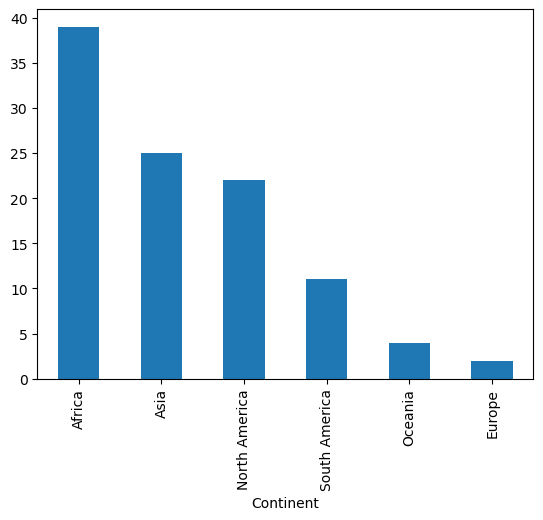

In [18]:
df['Continent'].value_counts().plot(kind  = 'bar') #africa produce sugarcane max

In [19]:
df.describe()

,Production(Tons),Production_per_person (Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.030000e+02,1.030000e+02,1.020000e+02,102.000000
mean,1.832407e+07,4.084763e+05,2.498981e+05,52628.078431
std,8.379760e+07,8.636106e+05,1.137003e+06,30504.676683
min,1.000000e+00,0.000000e+00,0.000000e+00,10.000000
25%,4.298850e+04,1.015600e+04,1.104000e+03,29072.025000
50%,1.422432e+06,7.960600e+04,1.655800e+04,54108.950000
75%,6.145648e+06,2.755895e+05,8.047400e+04,73282.700000
max,7.686784e+08,4.816299e+06,1.022620e+07,129049.300000


#checking for outliers

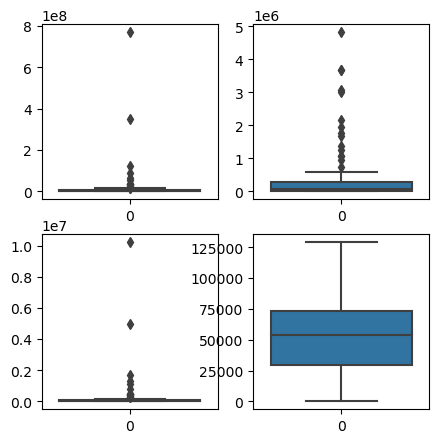

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (5,5))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])

plt.subplot(2,2,2)
sns.boxplot(df['Production_per_person (Kg)'])

plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])
plt.show()

Distribution of the columns


C:\Users\sreev\AppData\Local\Temp\ipykernel_35400\1318569261.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\sreev\AppData\Local\Temp\ipykernel_35400\1318569261.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_person (Kg)'])
C:\Users\sre

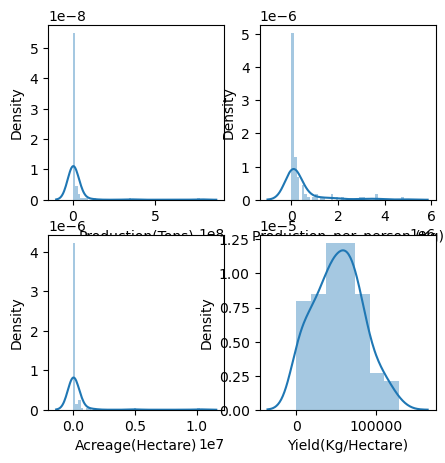

In [21]:
plt.figure(figsize = (5,5))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])

plt.subplot(2,2,2)
sns.distplot(df['Production_per_person (Kg)'])

plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])
plt.show()

<Axes: >

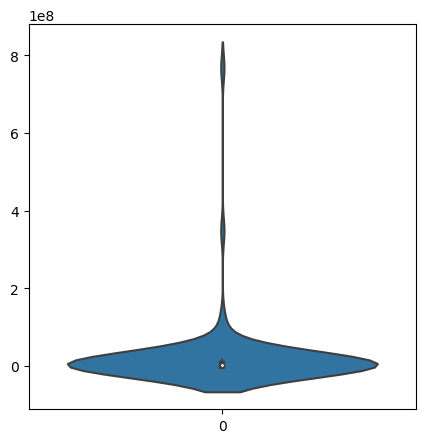

In [22]:
plt.figure(figsize = (5,5))
sns.violinplot(df['Production(Tons)'])



Bivariate Analysis

In [23]:
df.head()

,Country,Continent,Production(Tons),Production_per_person (Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


In [24]:
#WHICH country produces maximum sugarcane?
df_new = df[['Country','Production(Tons)']].set_index('Country')

In [25]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Djibouti,53.0
Singapore,50.0


In [26]:
df_new['Production(Tons)_percent'] = df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [27]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072728e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Lebanon,97.0,5.139401e-06
Djibouti,53.0,2.808126e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

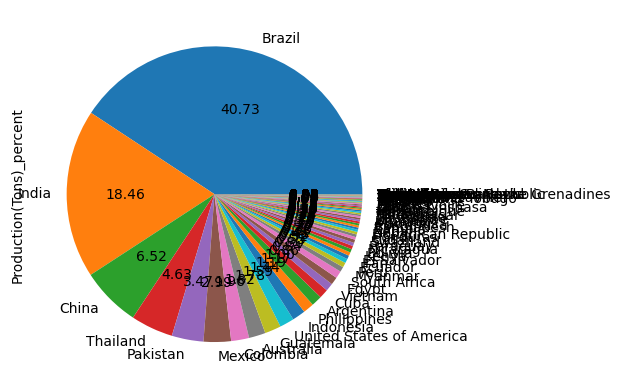

In [28]:
df_new['Production(Tons)_percent'].plot(kind = 'pie',autopct = '%.2f') #brazil highest

AttributeError: 'Axes' object has no attribute 'sort_values'

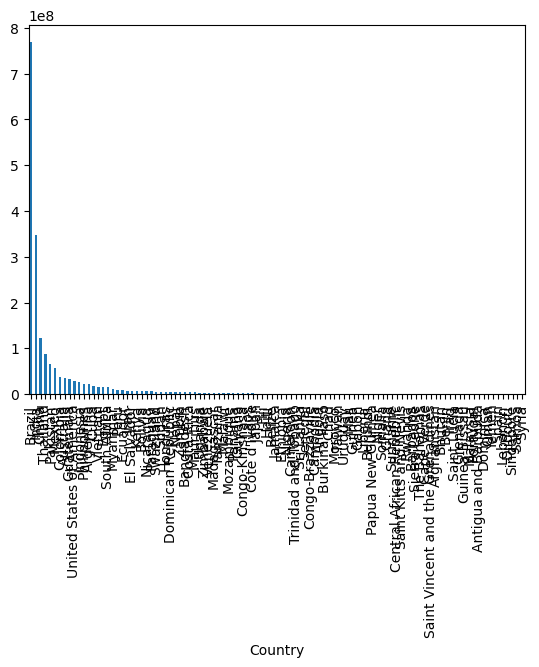

In [29]:
df_new['Production(Tons)'].plot(kind = 'bar').sort_values('Production(Tons)')

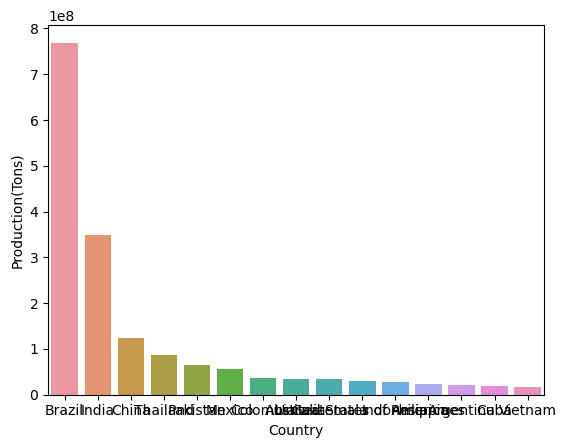

In [30]:
ax = sns.barplot(data = df.head(15),x = 'Country',y = 'Production(Tons)')
plt.show()

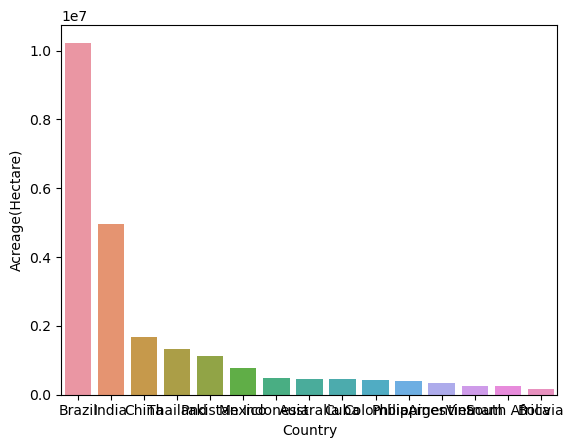

In [31]:
#which country has highest land?
df_acr = df.sort_values('Acreage(Hectare)',ascending = False).head(15)
ax = sns.barplot(data = df_acr,x= 'Country',y = 'Acreage(Hectare)')
plt.show()

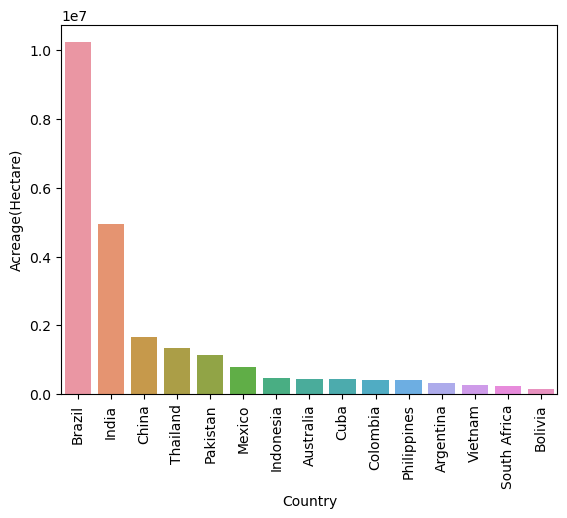

In [32]:
df_acr = df.sort_values('Acreage(Hectare)',ascending = False).head(15)
ax = sns.barplot(data = df_acr,x= 'Country',y = 'Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

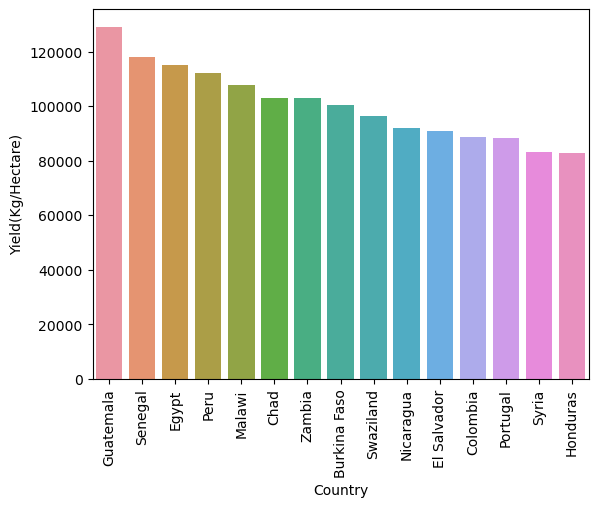

In [33]:
#which country has highest yield per hectare? -->#Guatemala
df_yield = df.sort_values('Yield(Kg/Hectare)',ascending = False).head(15)
ax = sns.barplot(data = df_yield,x= 'Country',y = 'Yield(Kg/Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

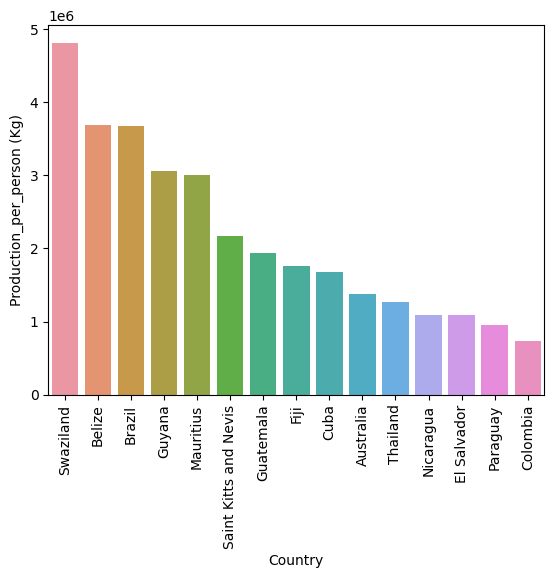

In [34]:
#which country has highest production per person? -->#Swaziland
df_ppp = df.sort_values('Production_per_person (Kg)',ascending = False).head(15)
ax = sns.barplot(data = df_ppp,x= 'Country',y = 'Production_per_person (Kg)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

CORRELATION

In [37]:
df.head(2)

,Country,Continent,Production(Tons),Production_per_person (Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5


In [36]:
total_columns = df.columns
total_columns

Index(['Country', 'Continent', 'Production(Tons)',
       'Production_per_person (Kg)', 'Acreage(Hectare)', 'Yield(Kg/Hectare)'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder

To_Encoder = ['Country','Continent']
Enconder_columns = LabelEncoder()

for columns in To_Encoder:
    if columns in total_columns:
        df[columns] = Enconder_columns.fit_transform(df[columns])

df

,Country,Continent,Production(Tons),Production_per_person (Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,11,5,768678382.0,3668531.0,10226205.0,75167.5
1,43,1,348448000.0,260721.0,4950000.0,70393.5
2,19,1,123059739.0,88287.0,1675215.0,73459.1
3,92,1,87468496.0,1264303.0,1336575.0,65442.2
4,67,1,65450704.0,324219.0,1130820.0,57879.0
...,...,...,...,...,...,...
98,51,1,97.0,16.0,3.0,28386.4
99,26,0,53.0,51.0,NaN,NaN
100,81,1,50.0,9.0,2.0,25.0
101,78,4,12.0,6.0,1.0,11949.8


In [40]:
df.corr()

,Country,Continent,Production(Tons),Production_per_person (Kg),Acreage(Hectare),Yield(Kg/Hectare)
Country,1.000000,-0.036205,-0.134360,-0.065743,-0.138748,0.021950
Continent,-0.036205,1.000000,0.181727,0.298983,0.165169,-0.003240
Production(Tons),-0.134360,0.181727,1.000000,0.352920,0.997550,0.132812
Production_per_person (Kg),-0.065743,0.298983,0.352920,1.000000,0.341974,0.220522
Acreage(Hectare),-0.138748,0.165169,0.997550,0.341974,1.000000,0.113433
Yield(Kg/Hectare),0.021950,-0.003240,0.132812,0.220522,0.113433,1.000000


<Axes: >

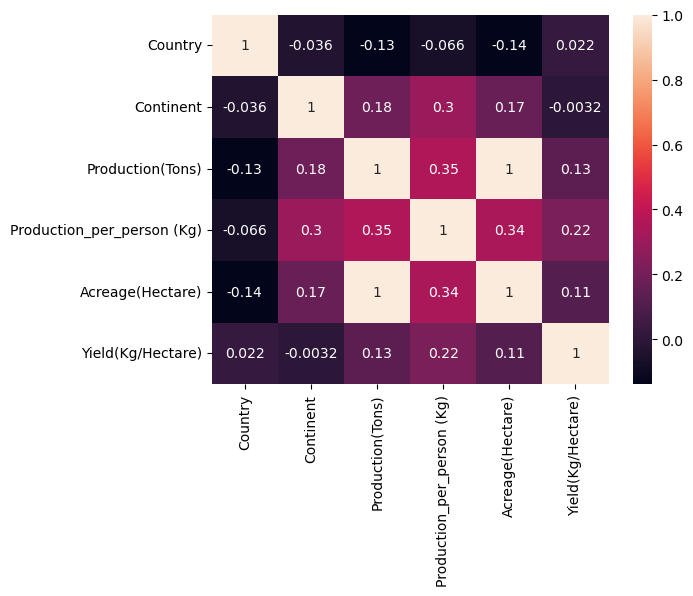

In [42]:
sns.heatmap(df.corr(),annot = True)

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

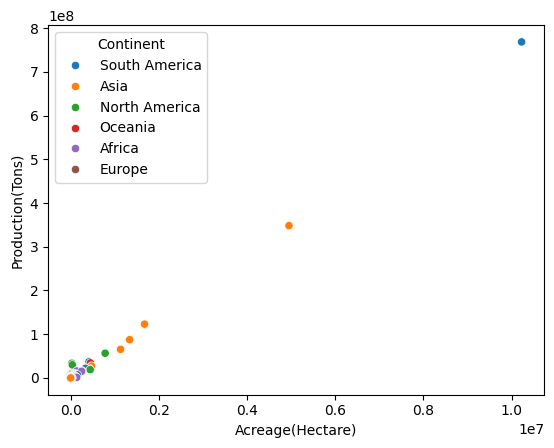

In [95]:
#DO countries with highest land produce more sugarcane? --> Overall increase in land increases the production
sns.scatterplot(data =df,x = 'Acreage(Hectare)',y = 'Production(Tons)',hue = 'Continent')

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

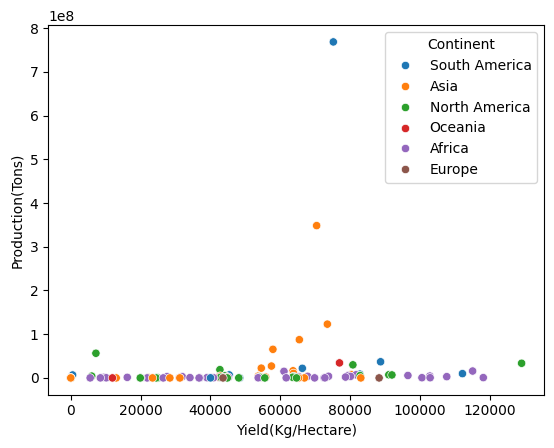

In [96]:
#Do countries which yield more sugarcane per hectare produces more sugarcane in total?
sns.scatterplot(data =df,x = 'Yield(Kg/Hectare)',y = 'Production(Tons)',hue = 'Continent')

In [97]:
df.head()

,Country,Continent,Production(Tons),Production_per_person (Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


In [99]:
#ANALYSIS FOR CONTINENT

df_continent = df.groupby('Continent').sum()
df_continent

,Country,Production(Tons),Production_per_person (Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,10144161.0,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.0,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,677192.7


In [100]:
df_continent['no_of_countries'] = df.groupby('Continent').count()['Country']
df_continent

,Country,Production(Tons),Production_per_person (Kg),Acreage(Hectare),Yield(Kg/Hectare),no_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,10144161.0,1439089.0,2142107.5,39
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.0,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,677192.7,11


<Axes: xlabel='Continent'>

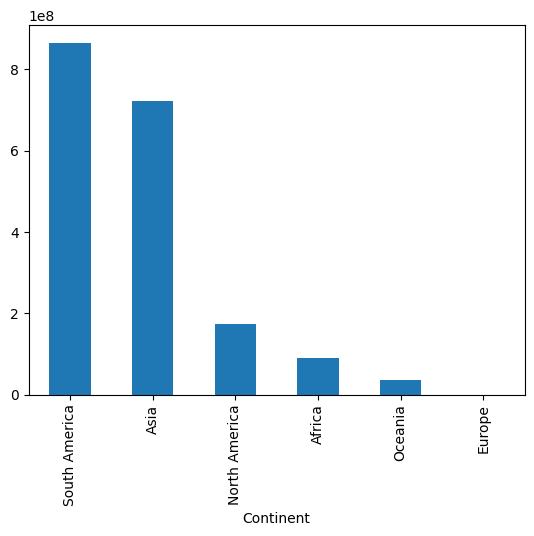

In [105]:
#WHICH CONTINENT PRODUCES MAX SUGARCANE?
df_continent['Production(Tons)'].sort_values(ascending = False).plot(kind = 'bar')

In [107]:
#DO NO OF COUNTRIES IN A CONTINENT EFFECTS PRODUCTION OF SUGAR?
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

SyntaxError: invalid non-printable character U+00A0 (1348345925.py, line 4)

In [108]:
#Do continent with highest land produces more sugarcane?
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)

SyntaxError: unterminated string literal (detected at line 2) (2037927880.py, line 2)

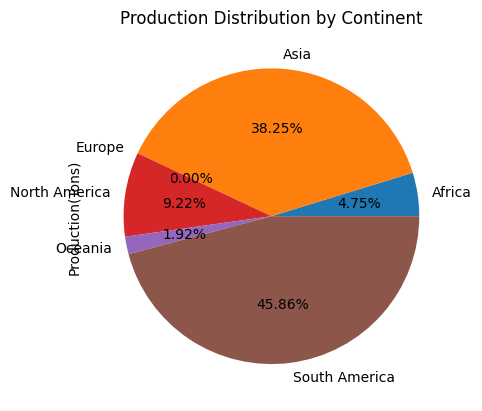

In [109]:
#Production distribution by continent
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

In [110]:
#Correlation for continent
df_continent.corr()

ValueError: could not convert string to float: "EgyptSouth AfricaKenyaSwazilandSudanZambiaMauritiusUgandaZimbabweMadagascarTanzaniaMalawiMozambiqueCongo-KinshasaCôte d'IvoireEthiopiaNigeriaCameroonSenegalCongo-BrazzavilleAngolaBurkina FasoChadMoroccoMaliGuineaGabonLiberiaBurundiNigerSomaliaGhanaCentral African RepublicRwandaSierra LeoneCape VerdeBeninGuinea-BissauDjibouti"